In [123]:
import cv2
import matplotlib.pyplot as plt
from glob import glob

In [133]:
# image path
imgs = glob('/mnt/ssd2/tekim/datasets/roboflow_vest/1207data/*/images/*')

In [134]:
# label path

# 같은 폴더에 담긴경우
# labels = [img[:-4] + '.txt' for img in imgs]
# images , labels 폴더에 각각 담긴경우
labels = [img.split('images')[0] + 'labels' + img.split('images')[1][:-4] + '.txt' for img in imgs]

In [135]:
imgs[0]

'/mnt/ssd2/tekim/datasets/roboflow_vest/1207data/test/images/frame-010_jpg.rf.f451afcfedf313755b979b3ed78a6a5b.jpg'

In [136]:
# img = cv2.imread('./2021-09-01_07-00-00_wed_sunny_out_se-yk_C12-0306_고2_167.jpg')
img = cv2.imread(imgs[0])
img = cv2.cvtColor(img , cv2.COLOR_BGR2RGB)

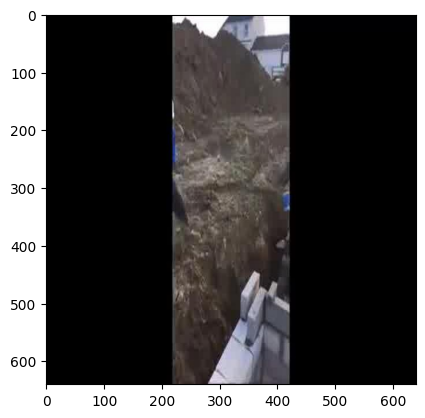

In [138]:
plt.imshow(img)

In [139]:
def convert(bbox):
    bbox = bbox.strip().split(' ')
    
    box = [float(coor) * img.shape[0] if i % 2 == 0 else float(coor) * img.shape[1]  for i,coor in enumerate(bbox)]
        
    pt1 = (int(box[1] - box[3]/2) , int(box[2] - box[4]/2))
    pt2 = (int(box[1] + box[3]/2) , int(box[2] + box[4]/2))
    
    return pt1, pt2, bbox[0]
    
    
    
    

In [140]:
def show_labeled_img(img_path,label_path):
    with open(label_path,'r') as f:
        boxes = f.readlines()
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img , cv2.COLOR_BGR2RGB)
    for box in boxes:
        pt1 , pt2, cls = convert(box)
        img = cv2.rectangle(img, pt1=pt1, pt2=pt2, color= (255,0,0) ,thickness=4)
        img = cv2.putText(img=img, text=str(cls), org= pt1,fontFace=cv2.FONT_HERSHEY_PLAIN ,fontScale=2,color=(255,0,0),thickness=2)
    plt.imshow(img)
    plt.show()

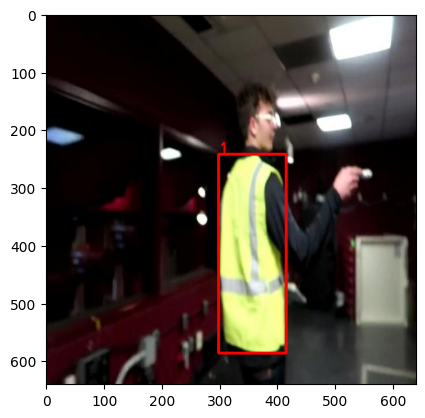

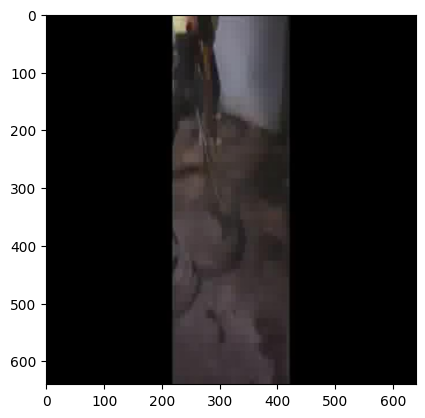

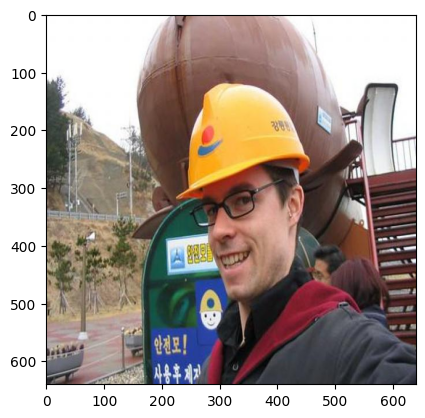

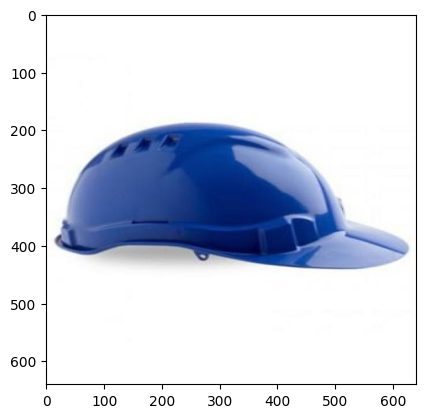

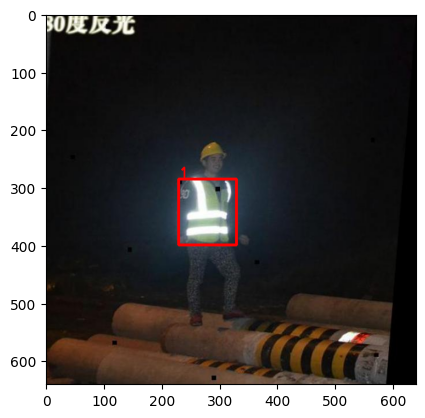

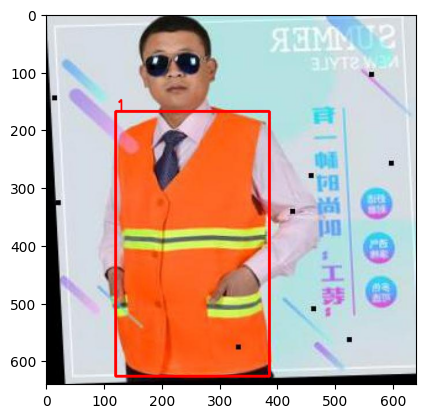

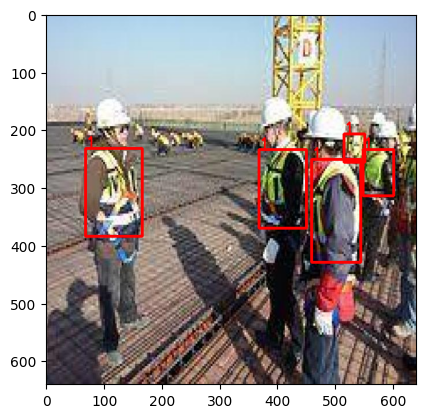

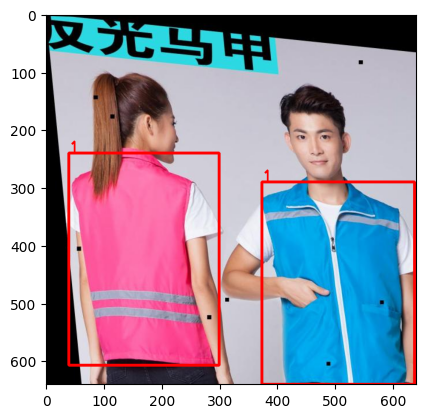

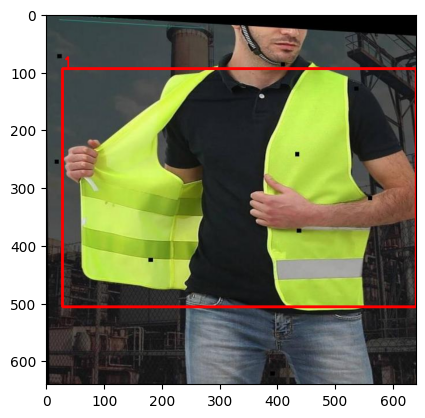

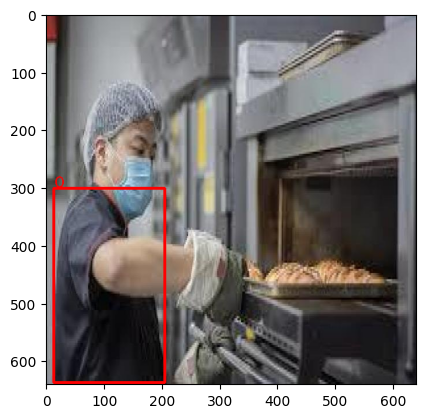

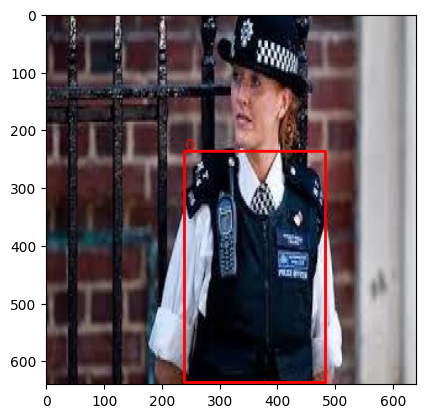

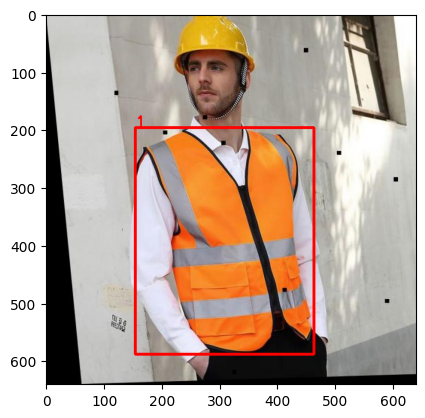

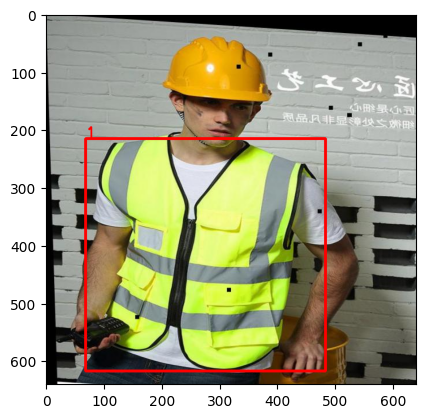

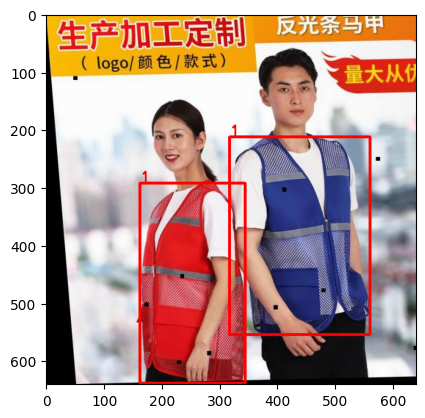

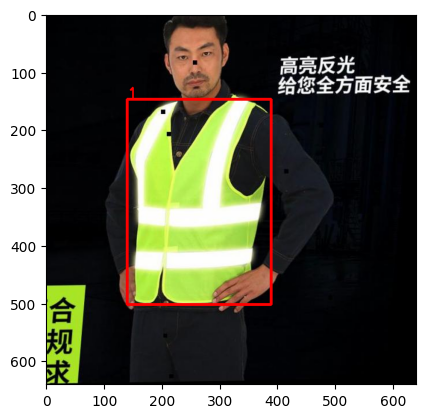

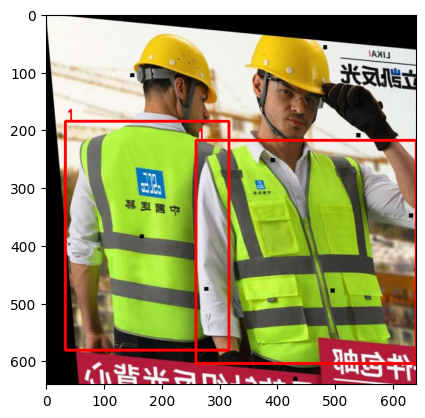

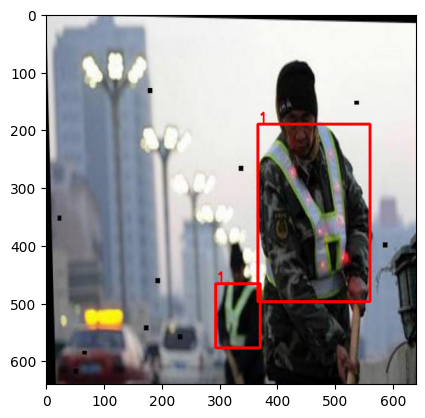

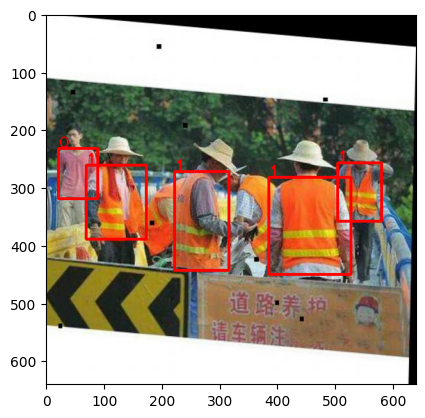

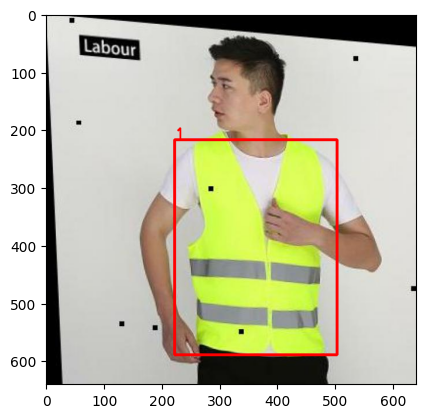

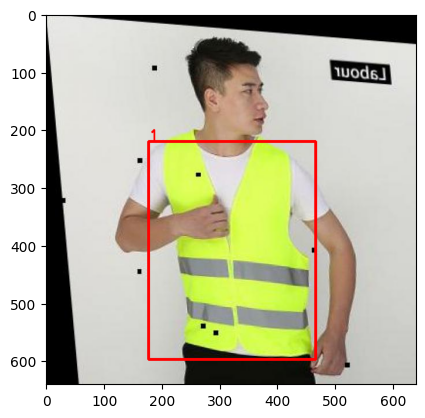

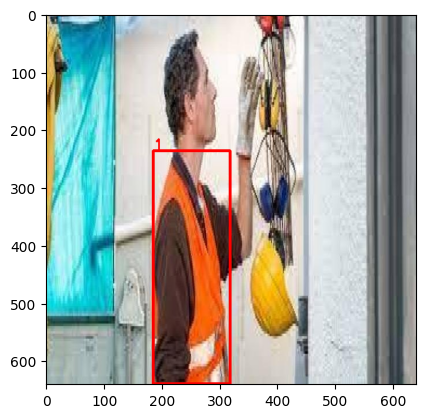

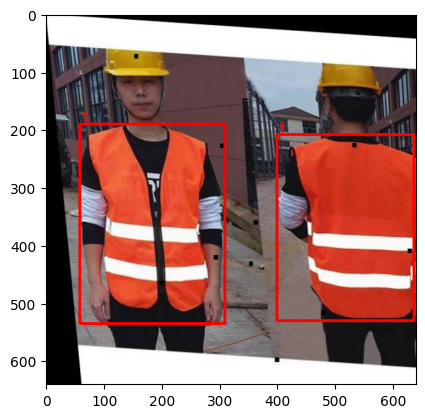

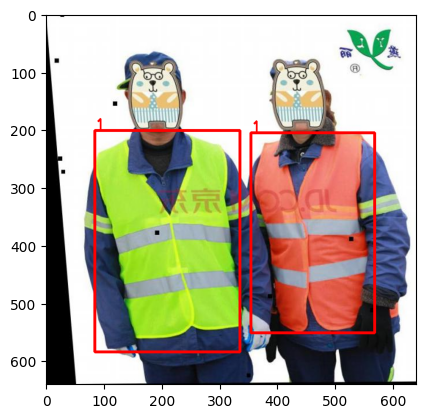

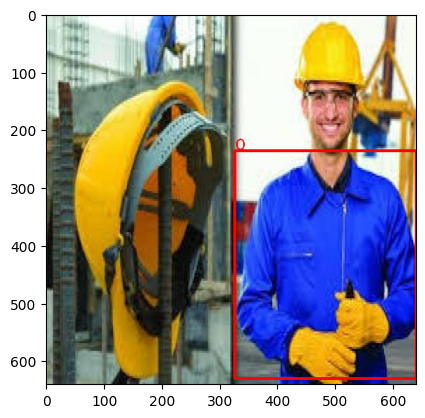

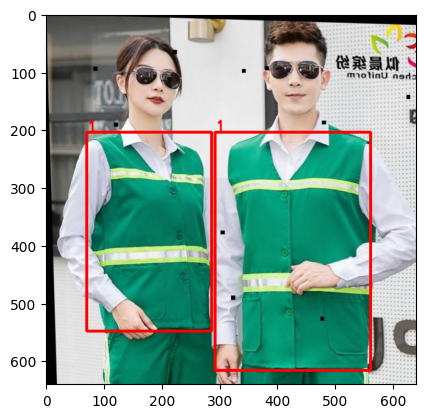

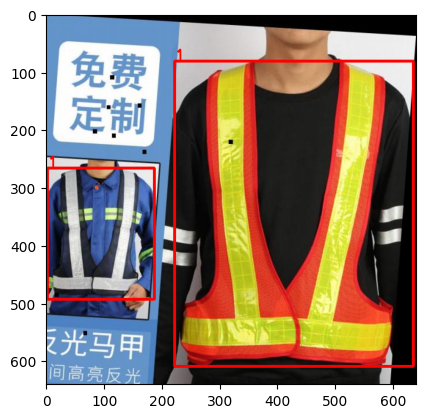

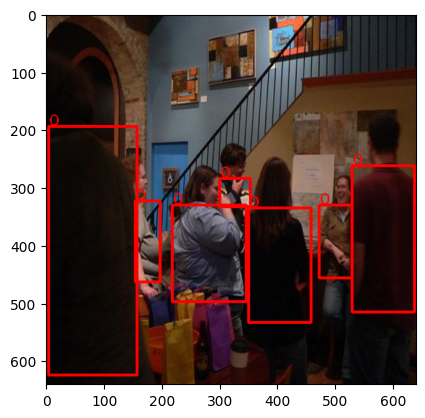

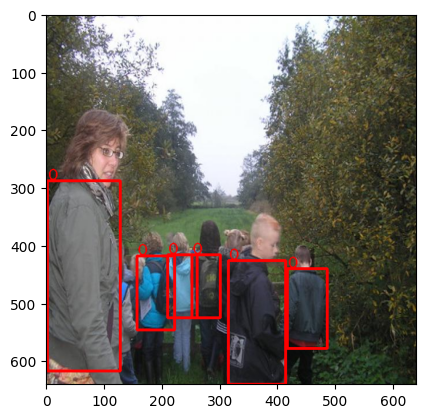

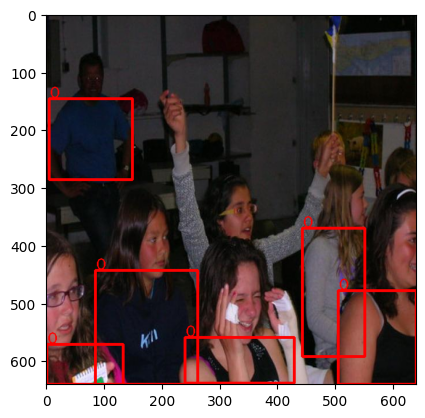

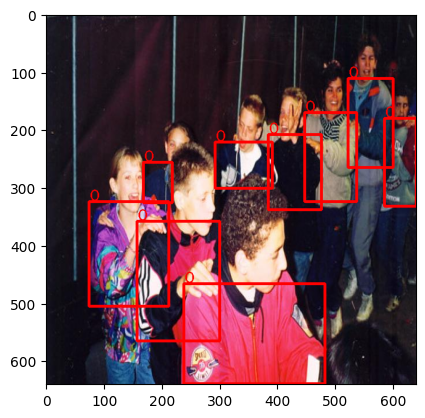

In [142]:
start_num = 40
additional_num = 30
for i in range(start_num,start_num+additional_num):
    show_labeled_img(imgs[i],labels[i])

In [115]:
'asfdsdaf sdaf\n'.strip()

'asfdsdaf sdaf'